###Author: [Haider Ali](https://www.kaggle.com/haiderali2582)
###Dataset: Heart Disease UCI
###Date:19 March 2024





###About Dataset

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more

###Content
###Column Descriptions:
`id` (Unique id for each patient)
### `age` (Age of the patient in years)
### `origin` (place of study)
### `sex` (Male/Female)
### `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
###`trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
###`chol` (serum cholesterol in mg/dl)
###`fbs` (if fasting blood sugar > 120 mg/dl)
###`restecg` (resting electrocardiographic results)
###`thalach`: maximum heart rate achieved
###`exang`: exercise-induced angina (True/ False)
###`oldpeak`: ST depression induced by exercise relative to rest
###`slope`: the slope of the peak exercise ST segment
###`ca`: number of major vessels (0-3) colored by fluoroscopy
###`thal`: [normal; fixed defect; reversible defect]
###`num`: the predicted attribute

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### LOADING THE DATASET


In [4]:
df=pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### EXPLORATORY DATA ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.shape

(920, 16)

In [7]:
#age column
df['age'].min(),df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

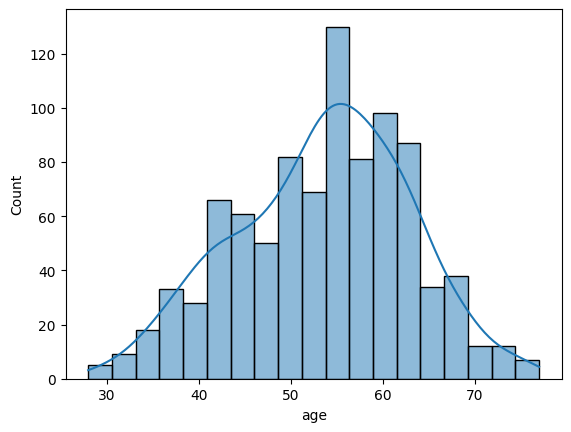

In [8]:
sns.histplot(df['age'],kde=True)

Mean : 53.51086956521739
Mode : 54
Median : 54.0


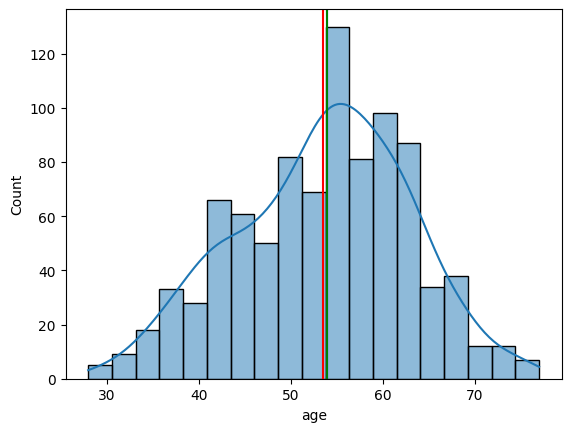

In [9]:
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].mode()[0],color='blue')
plt.axvline(df['age'].median(),color='green')
# print the values of mean, median, and mode
print("Mean :", df['age'].mean())
print('Mode :', df['age'].mode()[0])
print('Median :', df['age'].median())

In [10]:
# plotting age column on the basis of sex
fig=px.histogram(data_frame=df,x='age',color='sex')
fig.show()

In [18]:
#  Calculate the percentages of male and female in the data.Print how much percent males are more than female

male_count = df['sex'].value_counts()['Male']
female_count = df['sex'].value_counts()['Female']

total_count = male_count + female_count

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

male_more_than_female = ((male_count-female_count)/female_count)*100

print(f"Males: {male_percentage:.2f}%")
print(f"Females: {female_percentage:.2f}%")
print(f"Males are {male_more_than_female:.2f}% more than females")


Males: 78.91%
Females: 21.09%
Males are 274.23% more than females


In [19]:
# Lets deal with dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [20]:
df['dataset'].value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

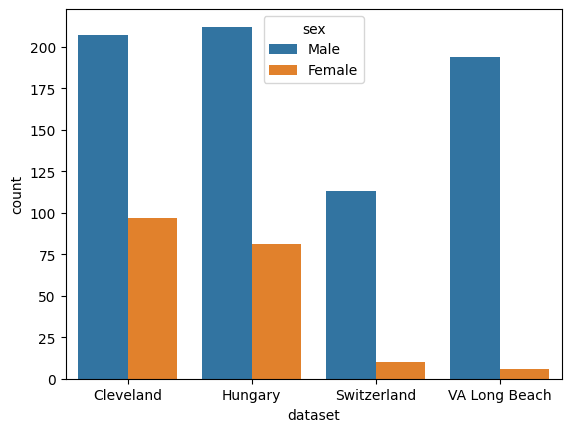

In [24]:
#  print the countplot of dataset column

sns.countplot(data=df,x='dataset',hue='sex')


In [25]:
#  groupby sex column by dataset  column

df.groupby('sex')['dataset'].value_counts()


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: dataset, dtype: int64

In [29]:
#  Make a plot of age column using plotly amd color using dataset

fig = px.histogram(df, x="age", color="dataset",
            title="Distribution of Age by Dataset")
fig.show()


In [35]:
#   groupby using dataset column Print the mean median mode of age column separately

for dataset in df['dataset'].unique():
  df_subset = df[df['dataset'] == dataset]
  print(f"Dataset: {dataset}")
  print(f"Mean age: {df_subset['age'].mean():.2f}")
  print(f"Median age: {df_subset['age'].median():.2f}")
  print(f"Mode age: {df_subset['age'].mode()[0]}")
  print()


Dataset: Cleveland
Mean age: 54.35
Median age: 55.50
Mode age: 58

Dataset: Hungary
Mean age: 47.89
Median age: 49.00
Mode age: 54

Dataset: Switzerland
Mean age: 55.32
Median age: 56.00
Mode age: 61

Dataset: VA Long Beach
Mean age: 59.35
Median age: 60.00
Mode age: 62



In [36]:
# Now exploring Chest pain Column (cp)
df['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [40]:
# prompt: draw the plot of age column in plotly and color using cp

fig = px.histogram(data_frame=df, x="age", color="cp")
fig.show()


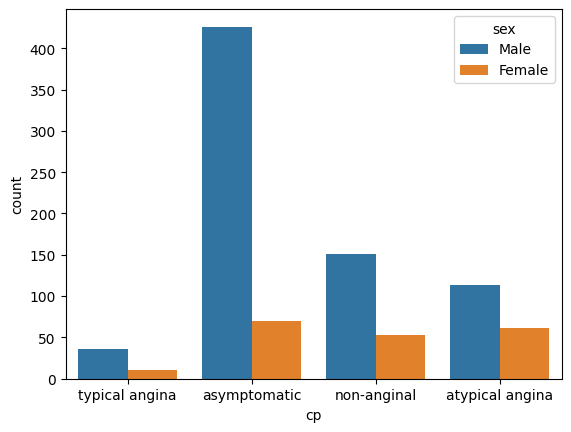

In [42]:
# countplot of cp column using sex column

sns.countplot(data=df, x="cp", hue="sex")
plt.show()


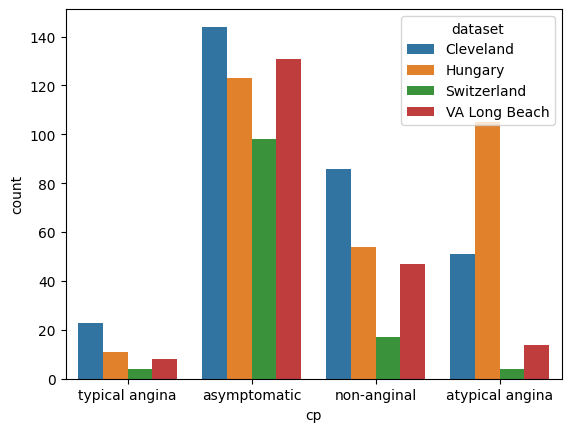

In [43]:
#  countplot of cp column using dataset column

sns.countplot(data=df, x="cp", hue="dataset")
plt.show()


In [ ]:
# Exploring the trestbps resting blood pressure resting blood pressure in mm Hg on admission to the hospital
df['trestbps'].describe()

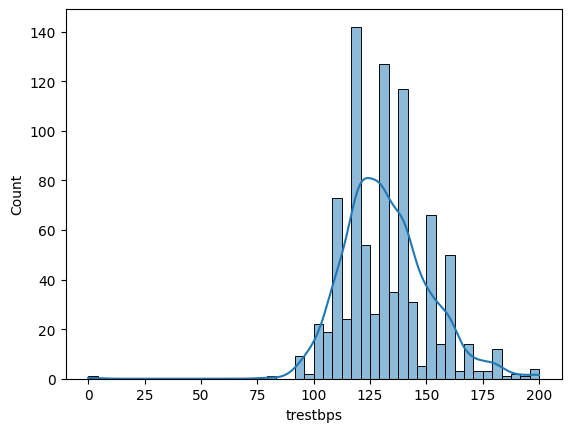

In [46]:
#] create a histplot of  trestbps

sns.histplot(data=df, x="trestbps", kde=True)
plt.show()


In [48]:
# prompt: percentage of missing values in trestbps column

missing_values = df['trestbps'].isnull().sum()
total_values = len(df['trestbps'])
missing_percentage = (missing_values / total_values) * 100
print(f"Percentage of missing values in trestbps column: {missing_percentage:.2f}%")


Percentage of missing values in trestbps column: 6.41%


In [50]:
# prompt: Impute the missing values in trestbps column using iterative imputer and print missing values

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an IterativeImputer object
imputer = IterativeImputer(max_iter=10)

# Impute the missing values in the trestbps column
df['trestbps'] = imputer.fit_transform(df['trestbps'].values.reshape(-1, 1))

# Print the number of missing values in the trestbps column
missing_values = df['trestbps'].isnull().sum()
print(f"Number of missing values in trestbps column after imputation: {missing_values}")


Number of missing values in trestbps column after imputation: 0


In [52]:
#  Lets check missing values in other columns

# Check for missing values in other columns
missing_values_per_column = df.isnull().sum()

# Print the number of missing values in each column
for column, missing_count in missing_values_per_column.items():
  if missing_count > 0:
    print(f"Column: {column}, Missing Values: {missing_count}")


Column: chol, Missing Values: 30
Column: fbs, Missing Values: 90
Column: restecg, Missing Values: 2
Column: thalch, Missing Values: 55
Column: exang, Missing Values: 55
Column: oldpeak, Missing Values: 62
Column: slope, Missing Values: 309
Column: ca, Missing Values: 611
Column: thal, Missing Values: 486


In [68]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

In [67]:
classifier_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
regressor_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [70]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    # print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [71]:
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in classifier_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in regressor_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values restecg : 20.65%
The feature 'restecg' has been imputed with 76.71 accuracy

Missing Values thalch : 5.98%
MAE = 16.748554913294797 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5580639534883721 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 75.86 accuracy



### Missing Values Imputed Sucessfully


In [73]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [74]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,1.0,normal,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,normal,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,normal,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,normal,172.0,False,1.4,upsloping,0.0,normal,0


### Now Dealing with outliers

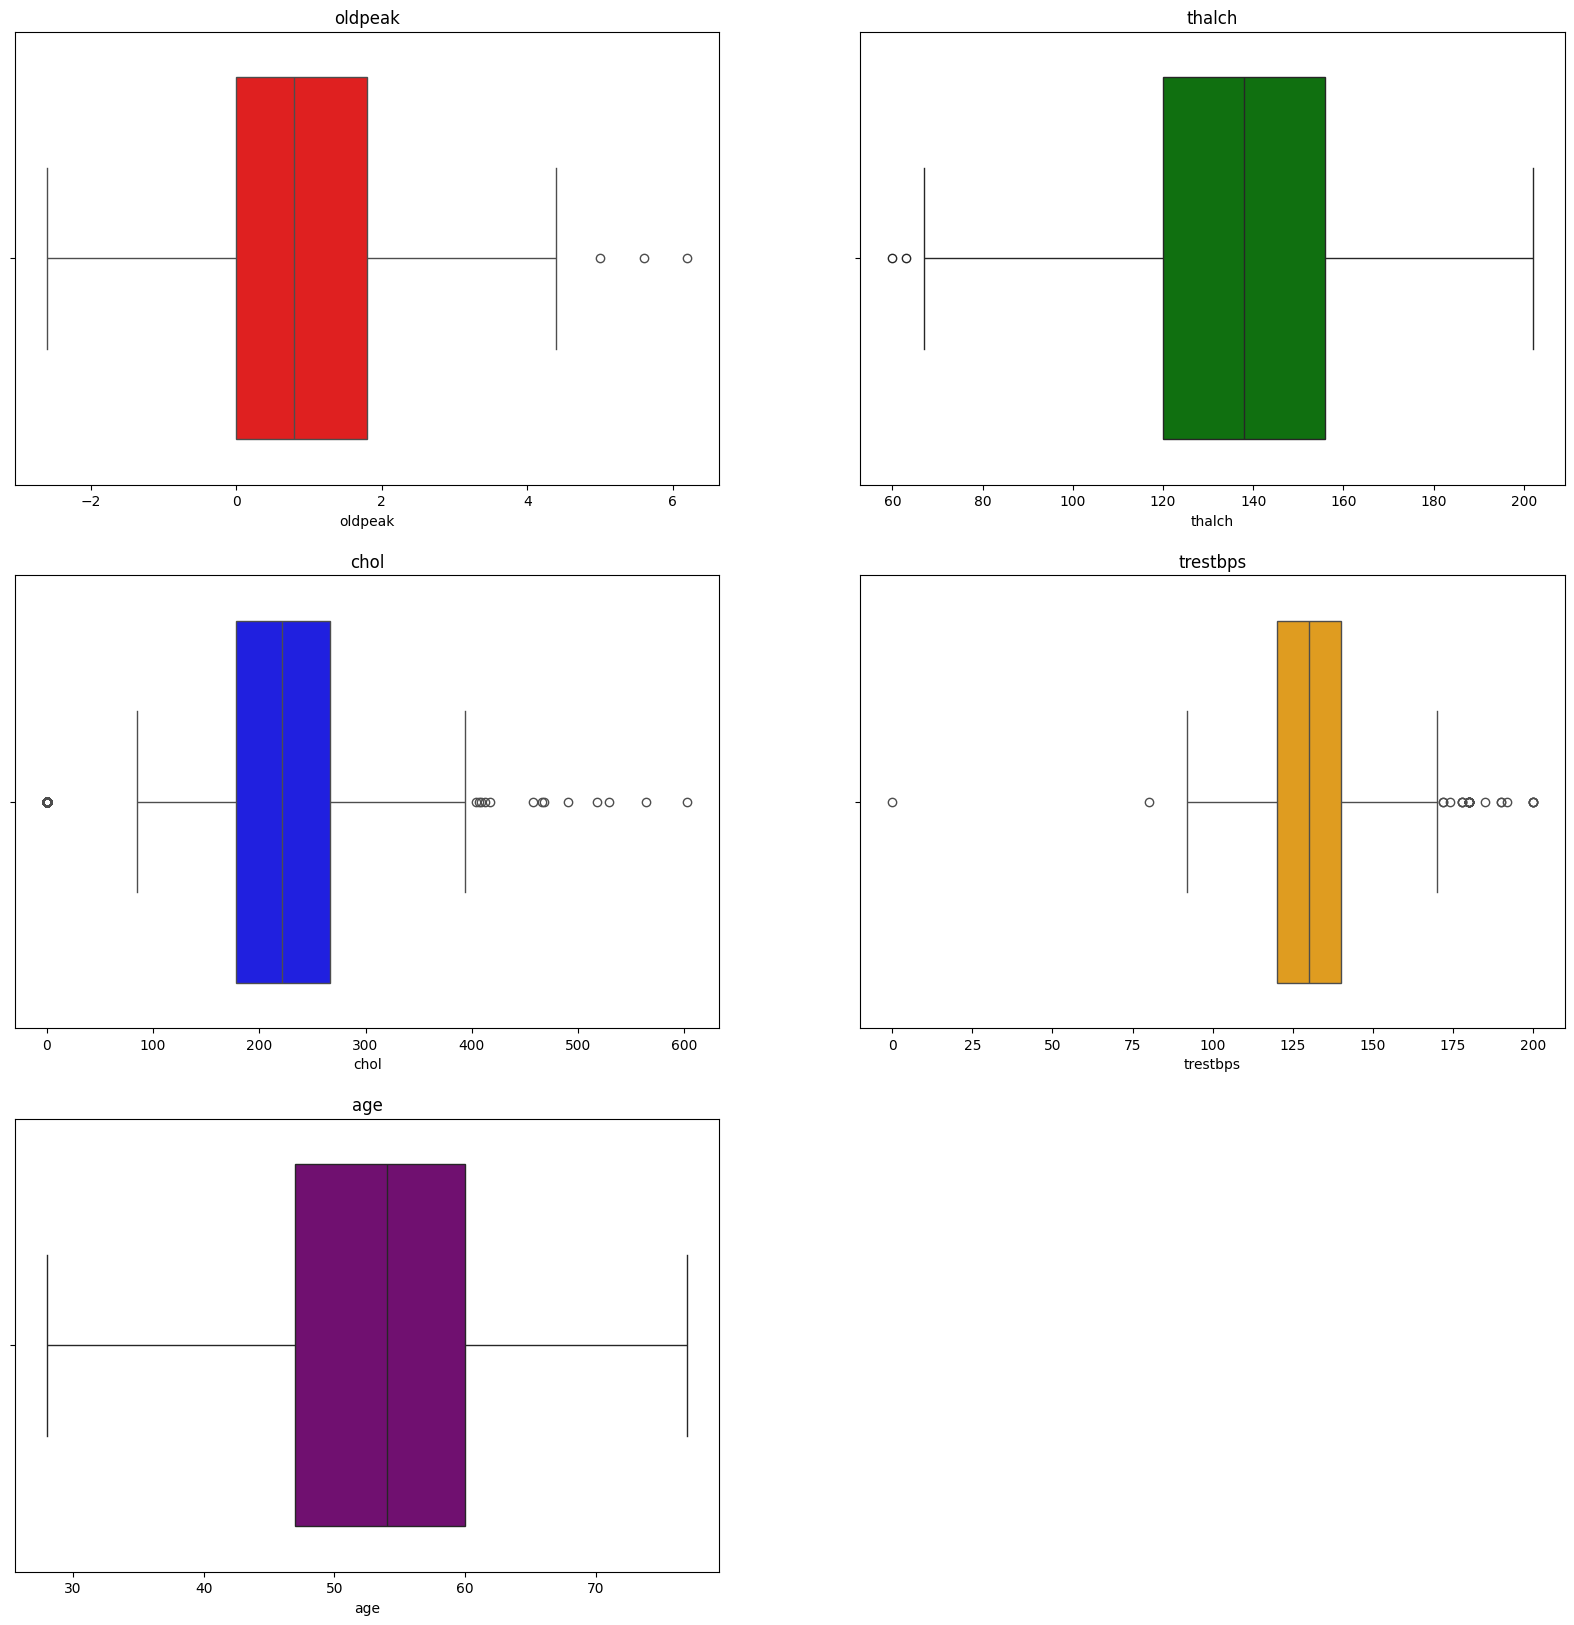

In [76]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1) # i+1 is used for incrementing the loop iteration
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()


In [79]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()


In [80]:
# print the row with trestbp 0
df[df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,0.0,normal,155.0,False,1.5,flat,0.0,reversable defect,3


In [81]:
#  remove this row

df = df.drop(df.loc[df['trestbps'] == 0].index)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    float64
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(6), int64(3), object(7)
memory usage: 122.1+ KB


In [83]:
# prompt: print the row in df where chol is 0

df[df['chol']==0]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.000000,0.0,0.0,normal,127.00,False,0.700,upsloping,0.0,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.000000,0.0,0.0,normal,154.00,False,0.200,upsloping,0.0,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,132.132404,0.0,0.0,normal,130.00,True,1.432,flat,0.0,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.000000,0.0,0.0,normal,125.00,True,1.000,flat,0.0,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.000000,0.0,0.0,normal,166.00,False,2.800,upsloping,0.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,0.0,normal,120.00,False,0.500,upsloping,0.0,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,1.0,st-t abnormality,160.00,False,3.000,flat,0.0,fixed defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,0.0,st-t abnormality,110.00,True,1.000,downsloping,0.0,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,0.0,st-t abnormality,122.96,True,1.816,flat,1.0,reversable defect,1


### Now Applying Machine Learning For Prediction

In [84]:
#  Split the data with target label "num"

X = df.drop('num', axis=1)
y = df['num']


In [85]:
# prompt: Encode X data using label encoder for all categorical and object columns

le = LabelEncoder()
for col in X.select_dtypes(include=['object', 'category']):
  X[col] = le.fit_transform(X[col])


In [86]:
#  Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [87]:
#  import the best multi classification models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [93]:
# prompt: Iterate over the models and evaluate their performance using cross validation.Save the best models

models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f"Model: {model.__class__.__name__}, CV Mean Accuracy: {scores.mean():.2f}")

best_model = max(models, key=lambda model: cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean())

print(f"Best Model: {best_model.__class__.__name__}")



Model: LogisticRegression, CV Mean Accuracy: 0.52
Model: KNeighborsClassifier, CV Mean Accuracy: 0.58
Model: SVC, CV Mean Accuracy: 0.59
Model: XGBClassifier, CV Mean Accuracy: 0.67
Model: RandomForestClassifier, CV Mean Accuracy: 0.69
Model: AdaBoostClassifier, CV Mean Accuracy: 0.58
Model: GradientBoostingClassifier, CV Mean Accuracy: 0.68
Model: GaussianNB, CV Mean Accuracy: 0.60
Model: DecisionTreeClassifier, CV Mean Accuracy: 0.63
Best Model: RandomForestClassifier


### The Best performing model is Random Forest Classifier .

In [94]:
# Save the random forest classifier model

import pickle

# Save the model
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


---
# **Comprehensive Report About The Insights**
---

## Age Distribution:
- There are 920 data points, and the average age is approximately **53.5** years, with an average difference of **9.4** years.
- The youngest person is **28** years old, and the oldest is **77** years.
- The majority of ages fall between **47** to **60** years.

## Gender Distribution:
- Approximately **77.77%** of individuals with heart disease in the dataset are males.
- Approximately **22.22%** of individuals with heart disease in the dataset are females.

## Age and Heart Disease:
- The age range **54-55** has the highest occurrence of heart disease.

## Regional Analysis:


**"In the dataset, Hungary has the highest heart disease prevalence at 32.7%, followed by Cleveland (31.7%), VA Long Beach (22.4%), and Switzerland (13.2%), considering both males and females."**

  - **Female:**
  - <font color="#FFA500">Cleveland</font>: **97**
  - <font color="#FFA500">Hungary</font>: **81**
  - <font color="#FFA500">Switzerland</font>: **10**
  - <font color="#FFA500">VA Long Beach</font>: **6**
- **Male:**
  - <font color="#FFA500">Hungary</font>: **212**
  - <font color="#FFA500">Cleveland</font>: **207**
  - <font color="#FFA500">VA Long Beach</font>: **194**
  - <font color="#FFA500">Switzerland</font>: **113**

## Age Statistics:
- **Mean Age:**
  - <font color="#FFA500">Cleveland</font>: **54.35**
  - <font color="#FFA500">Switzerland</font>: **55.32**
  - <font color="#FFA500">VA Long Beach</font>: **59.35**
  - <font color="#FFA500">Hungary</font>: **47.89**
- **Median Age:**
  - <font color="#FFA500">Cleveland</font>: **55.5**
  - <font color="#FFA500">Switzerland</font>: **56.0**
  - <font color="#FFA500">VA Long Beach</font>: **60.0**
  - <font color="#FFA500">Hungary</font>: **49.0**
- **Mode of Age:**
  - <font color="#FFA500">Cleveland</font>: **58**
  - <font color="#FFA500">Switzerland</font>: **61**
  - <font color="#FFA500">VA Long Beach</font>: **62, 63**
  - <font color="#FFA500">Hungary</font>: **54**

## Chest Pain Types:
- Asymptomatic: <font color="#FFA500">VA Long Beach</font> (129), Cleveland, Hungary, Switzerland.
- Atypical Angina: <font color="#FFA500">Hungary</font> (104), Cleveland, VA Long Beach, Switzerland.
- Non-Anginal: <font color="#FFA500">Cleveland</font> (80), Hungary, VA Long Beach, Switzerland.
- Typical Angina: <font color="#FFA500">Cleveland</font> (22), Hungary, VA Long Beach, Switzerland.

## Chest Pain by Gender:
- Asymptomatic more in males (404) than females (64).
- Atypical Angina more in males (110) than females (61).
- Non-Anginal more in males (143) than females (52).
- Typical Angina more in males (35) than females (10).

## Additional Information:
- Unique values in different columns:
  - **fbs**: <font color="#FFA500">True False</font>
  - **restecg**: <font color="#FFA500">'lv hypertrophy' 'normal' 'st-t abnormality'</font>
  - **exang**: <font color="#FFA500">False True</font>
  - **slope**: <font color="#FFA500">'downsloping' 'flat' 'upsloping'</font>
  - **thal**: <font color="#FFA500">'fixed defect' 'reversible defect' 'normal'</font>
- Mean values for various health indicators:
  - **chol**: <font color="#FFA500">243.26</font>
  - **trestbps**: <font color="#FFA500">131.90</font>
  - **thalach**: <font color="#FFA500">137.07</font>
  - **oldpeak**: <font color="#FFA500">0.93</font>
  - **ca**: <font color="#FFA500">0.41</font>

## Key Insights:
1. Minimum age for heart disease is **28** years.
2. Peak age for heart disease is around **53-54** years.
3. Most cases occur at age **54-55** for both males and females.
4. Males constitute **78.91%**, females **21.09%**.
5. Significant variation in male numbers across regions (e.g., Hungary, Cleveland).
6. Highest number of individuals from <font color="#FFA500">Cleveland</font> (**304**), lowest from <font color="#FFA500">Switzerland</font> (**123**).
   - Highest number of females in <font color="#FFA500">Cleveland</font> (**97**), lowest in <font color="#FFA500">VA Long Beach</font> (**6**).
   - Highest number of males in <font color="#FFA500">Hungary</font> (**212**), lowest in <font color="#FFA500">Switzerland</font> (**113**).
